In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


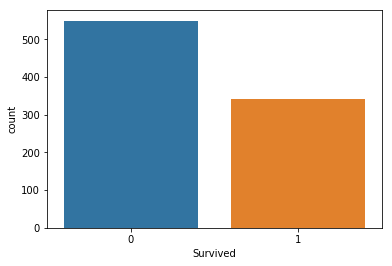

In [5]:
sns.countplot(train['Survived'])

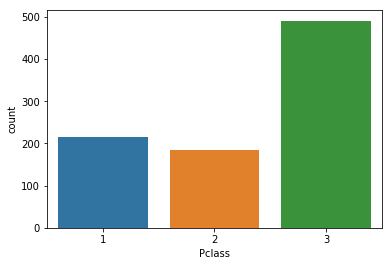

In [6]:
sns.countplot(train['Pclass'])

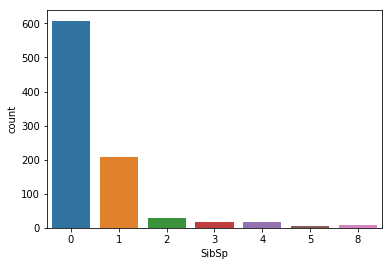

In [7]:
sns.countplot(train['SibSp'])

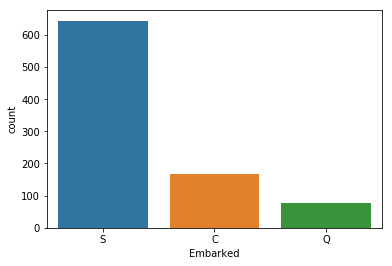

In [8]:
sns.countplot(train['Embarked'])

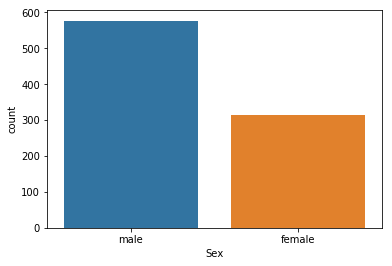

In [9]:
sns.countplot(train['Sex'])

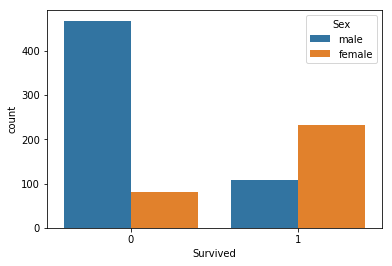

In [10]:
sns.countplot(x = "Survived" ,hue = 'Sex',data= train)

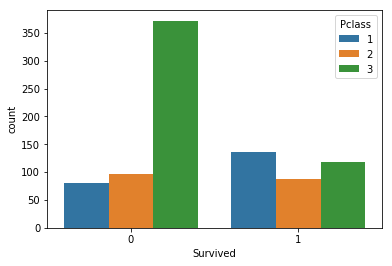

In [11]:
sns.countplot(x = "Survived" ,hue = 'Pclass',data= train)

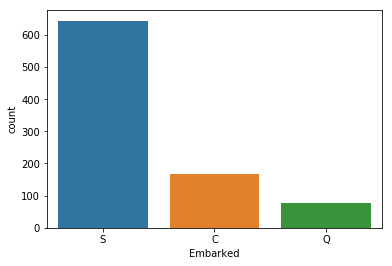

In [12]:
sns.countplot(train['Embarked'])

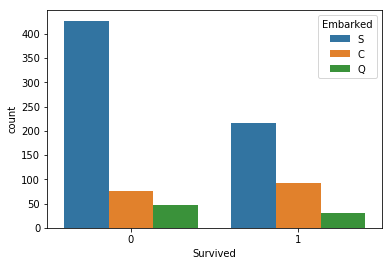

In [13]:
sns.countplot(x = 'Survived',hue= 'Embarked',data =train)

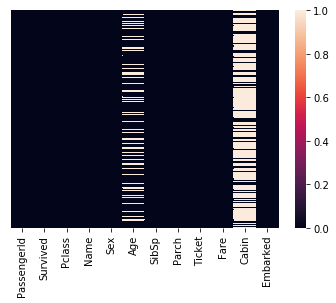

In [14]:
sns.heatmap(train.isnull(),yticklabels = False)

In [15]:
train.drop('Cabin',axis = 1,inplace = True)
test.drop('Cabin',axis = 1,inplace = True)

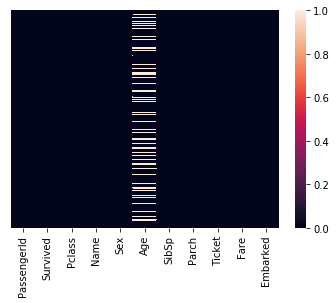

In [16]:
sns.heatmap(train.isnull(),yticklabels = False)

In [17]:
train['Age'].shape

(891,)

In [18]:
train['Age'].isnull().sum()

177

In [19]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(train['Age'].mean())


In [43]:
import seaborn as sns

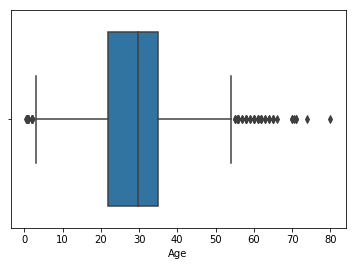

In [44]:
sns.boxplot(train['Age'])

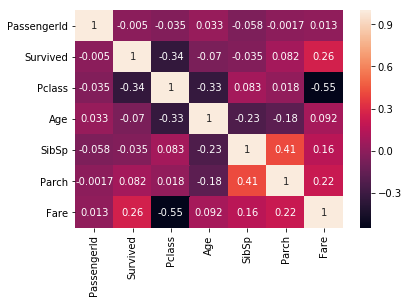

In [20]:
sns.heatmap(train.corr(),annot = True)

In [21]:
X = train.drop(['PassengerId','Survived','Name','Ticket'],axis = 1)
x = pd.get_dummies(X)
y = train['Survived']

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [23]:
dc = DecisionTreeClassifier()
lr = LogisticRegression(solver = 'liblinear')
xg = XGBClassifier()
rc = RandomForestClassifier(n_estimators = 10)

In [24]:
def cross_val(model,data_input,data_output):
    i = 1
    kf = KFold(n_splits = 5)
    for train_index,test_index in kf.split(data_input,data_output):
        xtr,xvl = data_input.loc[train_index],data_input.loc[test_index]     
        ytr,yvl = data_output[train_index],data_output[test_index]
        model.fit(xtr, ytr)     
        pred = model.predict(xvl)     
        score = accuracy_score(yvl,pred)
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        i+=1
        print('accuracy_score :',score)


In [25]:
print('DecisionTree: ')

cross_val(dc,x,y)

DecisionTree: 

1 of kfold 5
accuracy_score : 0.7430167597765364

2 of kfold 5
accuracy_score : 0.7808988764044944

3 of kfold 5
accuracy_score : 0.7808988764044944

4 of kfold 5
accuracy_score : 0.7584269662921348

5 of kfold 5
accuracy_score : 0.7808988764044944


In [26]:
print('Logistic Regression: ')
cross_val(lr,x,y)

Logistic Regression: 

1 of kfold 5
accuracy_score : 0.7821229050279329

2 of kfold 5
accuracy_score : 0.8033707865168539

3 of kfold 5
accuracy_score : 0.7752808988764045

4 of kfold 5
accuracy_score : 0.7528089887640449

5 of kfold 5
accuracy_score : 0.8426966292134831


In [27]:
print('XGboost: ')
cross_val(xg,x,y)

XGboost: 

1 of kfold 5
accuracy_score : 0.7877094972067039

2 of kfold 5
accuracy_score : 0.8258426966292135

3 of kfold 5
accuracy_score : 0.8314606741573034

4 of kfold 5
accuracy_score : 0.7752808988764045

5 of kfold 5
accuracy_score : 0.8707865168539326


In [28]:
print('Random Forest: ')
cross_val(rc,x,y)

Random Forest: 

1 of kfold 5
accuracy_score : 0.8044692737430168

2 of kfold 5
accuracy_score : 0.7865168539325843

3 of kfold 5
accuracy_score : 0.8202247191011236

4 of kfold 5
accuracy_score : 0.7640449438202247

5 of kfold 5
accuracy_score : 0.8202247191011236


In [29]:
submission = pd.read_csv('gender_submission.csv')

In [30]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [31]:
test_id = test['PassengerId']

In [36]:
test_da = test.drop(['PassengerId','Name','Ticket'],axis = 1)

In [37]:
test_dum = pd.get_dummies(test_da)

In [38]:
test_dum.shape

(418, 10)

In [39]:
sub = xg.predict(test_dum)

In [40]:
submission['PassengerId'] = test_id

In [41]:
submission['Survived'] = sub

In [42]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
